In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Install Kaggle and Download Dataset from it

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alirezabinayiaan","key":"6695753f607fbe237d61a47bae7a758b"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download jamiewelsh2/nba-player-salaries-2022-23-season

  0% 0.00/72.6k [00:00<?, ?B/s]
100% 72.6k/72.6k [00:00<00:00, 79.3MB/s]


## Unzip Dataset

In [7]:
!unzip -xq /content/nba-player-salaries-2022-23-season.zip

## Read Dataset

In [8]:
nba = pd.read_csv('/content/nba_salaries.csv')
nba.head(5)

,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,curryst01
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,walljo01
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,westbru01
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,jamesle01
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,duranke01


### Dataset Columns

In [9]:
nba.columns

Index(['Unnamed: 0', 'Player Name', 'Salary', 'Position', 'Age', 'Team', 'GP',
       'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Player-additional'],
      dtype='object')

### Dataset Shape

In [10]:
nba.shape

(467, 32)

### Drop not Important Columns

In [11]:
nba.drop(['Unnamed: 0', 'Player-additional'], axis=1, inplace=True)

In [12]:
nba.shape

(467, 30)

### Information About Dataset

In [13]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player Name  467 non-null    object 
 1   Salary       467 non-null    int64  
 2   Position     467 non-null    object 
 3   Age          467 non-null    int64  
 4   Team         467 non-null    object 
 5   GP           467 non-null    int64  
 6   GS           467 non-null    int64  
 7   MP           467 non-null    float64
 8   FG           467 non-null    float64
 9   FGA          467 non-null    float64
 10  FG%          466 non-null    float64
 11  3P           467 non-null    float64
 12  3PA          467 non-null    float64
 13  3P%          454 non-null    float64
 14  2P           467 non-null    float64
 15  2PA          467 non-null    float64
 16  2P%          463 non-null    float64
 17  eFG%         466 non-null    float64
 18  FT           467 non-null    float64
 19  FTA     

## Missing Value

In [14]:
nba.fillna(0, inplace=True)

##$1$ - Which player had the most salary? Plot Top 10 players.

In [15]:
nba[nba['Salary'].max() == nba['Salary']]

,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,...,0.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4


In [16]:
nba.loc[:,['Player Name', 'Salary']].sort_values('Salary', ascending=False)

,Player Name,Salary
0,Stephen Curry,48070014
1,John Wall,47345760
2,Russell Westbrook,47080179
3,LeBron James,44474988
4,Kevin Durant,44119845
...,...,...
462,Justin Minaya,35096
463,Kobi Simmons,32795
464,Gabe York,32171
465,RaiQuan Gray,5849


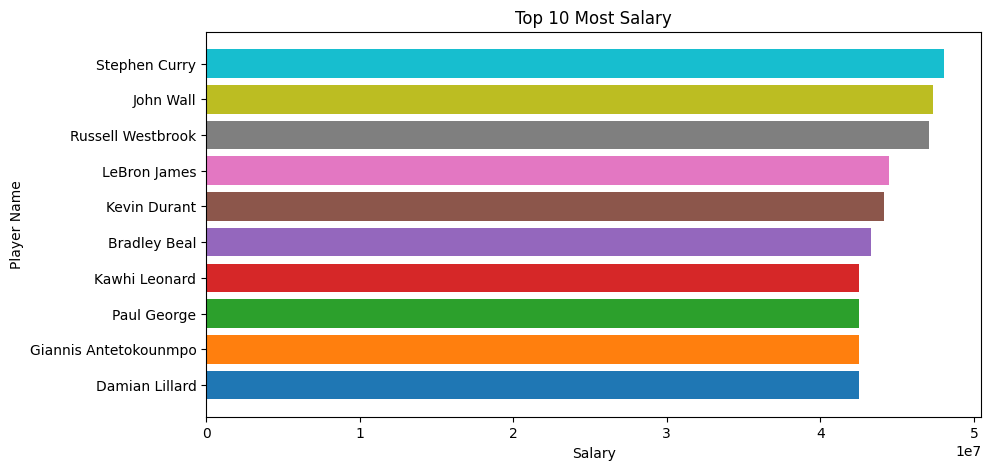

In [17]:
import matplotlib.colors as mcolors

colors = tuple(mcolors.TABLEAU_COLORS)

most_salary = nba.loc[:,['Player Name', 'Salary']].sort_values('Salary', ascending=True)
most_salary

fig = plt.figure(figsize = (10, 5))
plt.barh(most_salary.iloc[-10:,0], most_salary.iloc[-10:,1], color=colors[:10])
plt.xlabel("Salary")
plt.ylabel("Player Name")
plt.title("Top 10 Most Salary")
plt.show()

## $2$ - Which player had the lowest salary?

In [18]:
nba[nba['Salary'].min() == nba['Salary']]

,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
465,RaiQuan Gray,5849,PF,23,BRK,1,0,35.0,6.0,12.0,...,1.0,3.0,6.0,9.0,7.0,0.0,1.0,4.0,5.0,16.0
466,Jacob Gilyard,5849,PG,24,MEM,1,0,41.0,1.0,3.0,...,0.0,0.0,4.0,4.0,7.0,3.0,0.0,2.0,3.0,3.0


## $3$ - How many team do we have in dataset?

In [19]:
nba['Team'].nunique()

75

In [20]:
nba['Team'].unique()

array(['GSW', 'LAC', 'LAL/LAC', 'LAL', 'BRK/PHO', 'WAS', 'MIL', 'POR',
       'BRK/DAL', 'MIN', 'MIA', 'PHI', 'DAL', 'ATL', 'CHI', 'BRK', 'TOR',
       'IND', 'PHO', 'NOP', 'DEN', 'LAL/MIN', 'CLE', 'OKC', 'CLE/MIA',
       'BOS', 'SAC', 'CHO', 'NYK', 'MIN/UTA', 'HOU/LAC', 'MEM', 'ORL',
       'UTA', 'LAL/UTA', 'WAS/TOR', 'LAL/CHI', 'SAS', 'LAC/MEM',
       'NYK/POR', 'NOP/SAS', 'CLE/MEM', 'ORL/PHO', 'DEN/LAC', 'DET',
       'LAL/ORL', 'GSW/DET', 'HOU', 'SAS/TOR', 'BRK/DET', 'LAC/CHO',
       'GSW/POR', 'PHI/MIA', 'LAL/WAS', 'DAL/ATL', 'ORL/IND', 'PHI/POR',
       'OKC/PHO', 'MIL/IND', 'BOS/OKC', 'DET/POR', 'DET/ATL', 'HOU/ATL',
       'PHI/PHO', 'DEN/LAL', 'PHI/CHO', 'CHI/IND', 'BRK/SAC', 'SAS/MIL',
       'DET/OKC', 'BOS/TOR', 'BRK/LAC', 'SAS/PHI', 'BRK/MIA', 'MIA/WAS'],
      dtype=object)

As you can see soe player played in 2 different teams during the season

In [21]:
nba_team = set()

for t in nba['Team'].unique():
  if '/' in t:
    nba_team.update(t.split('/'))
  else:
    nba_team.add(t)

print(len(nba_team))
print(sorted(nba_team))

30
['ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']


## $4$ - Which team has paid the most salaries? Plot Top 10 Teams.

First of all seprate ```Salary``` and ```Team``` columns from data frame

In [22]:
nba_teams = nba.loc[:,['Salary', 'Team']]
nba_teams

,Salary,Team
0,48070014,GSW
1,47345760,LAC
2,47080179,LAL/LAC
3,44474988,LAL
4,44119845,BRK/PHO
...,...,...
462,35096,POR
463,32795,CHO
464,32171,IND
465,5849,BRK


If a player played in two different teams, his salary should be divided by 2.

In [23]:
nba_teams['Salary'] = nba_teams.apply(lambda row: row['Salary']/2 if '/' in row['Team'] else row['Salary'], axis=1)
nba_teams

,Salary,Team
0,48070014.0,GSW
1,47345760.0,LAC
2,23540089.5,LAL/LAC
3,44474988.0,LAL
4,22059922.5,BRK/PHO
...,...,...
462,35096.0,POR
463,32795.0,CHO
464,32171.0,IND
465,5849.0,BRK


Now in this part, we split rows that the ```Team``` column is like a $team1/team2$ pattern. Then used the ```explode``` method to set the divided salary for each of these 2 teams.

In [24]:
nba_teams['Team'] = nba_teams['Team'].str.split('/')
nba_teams = nba_teams.explode('Team', ignore_index=True)
nba_teams

,Salary,Team
0,48070014.0,GSW
1,47345760.0,LAC
2,23540089.5,LAL
3,23540089.5,LAC
4,44474988.0,LAL
...,...,...
525,35096.0,POR
526,32795.0,CHO
527,32171.0,IND
528,5849.0,BRK


Now grouped the data frame by ```Team```

In [25]:
nba_teams.groupby('Team').sum().sort_values('Salary', ascending=False)

,Salary
Team,
LAC,266577767.5
GSW,200603274.0
MIL,191834481.0
BOS,173706874.5
PHO,166409429.0
MIA,165538878.5
LAL,162103637.0
BRK,158531433.5
MIN,145306242.0


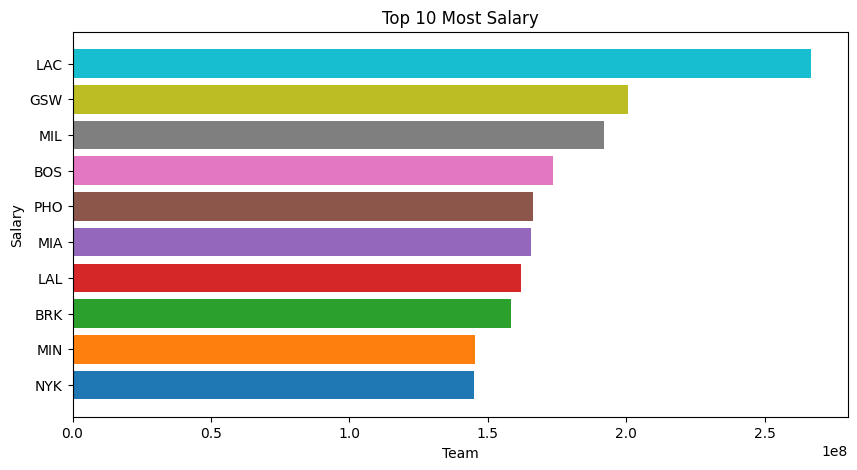

In [26]:
most_salary_by_team = nba_teams.groupby('Team')['Salary'].sum().sort_values(ascending=True)

fig = plt.figure(figsize = (10, 5))
plt.barh(most_salary_by_team.index[-10:], most_salary_by_team.values[-10:], color=colors[:10])
plt.xlabel("Team")
plt.ylabel("Salary")
plt.title("Top 10 Most Salary")
plt.show()

## $5$ - What was the average salary for players who were 30 or older? What about players who were less than 30?

In [27]:
nba[nba['Age'] >= 30]

,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,...,0.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4
1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,...,0.681,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4
2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,...,0.656,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9
3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,...,0.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9
4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,...,0.919,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,Anthony Gill,1836090,PF,30,WAS,59,8,10.6,1.2,2.2,...,0.731,0.6,1.1,1.7,0.6,0.1,0.2,0.3,1.2,3.3
398,Cody Zeller,743922,C,30,MIA,15,2,14.5,2.5,3.9,...,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5
399,Meyers Leonard,713558,C,30,MIL,9,2,12.7,1.6,3.2,...,0.889,1.3,2.4,3.8,0.1,0.2,0.0,0.7,1.8,4.8
401,Michael Carter-Williams,652829,PG,31,ORL,4,0,11.0,1.5,3.5,...,0.571,0.3,1.0,1.3,1.8,0.3,0.3,1.0,1.3,4.3


In [28]:
nba[nba['Age'] >= 30]['Salary'].mean()

15808581.125

In [29]:
nba[nba['Age'] < 30]['Salary'].mean()

6503848.590296496

## $6$ - Which position has been paid the most salaries? Plot average salaries in each Position.

Same as question 4, we do the same work here

In [30]:
nba['Position'].unique()

array(['PG', 'PF', 'SG', 'SF', 'PG-SG', 'C', 'SF-SG', 'SG-PG', 'SF-PF'],
      dtype=object)

In [31]:
pos = nba.loc[:, ['Salary', 'Position']]
pos

,Salary,Position
0,48070014,PG
1,47345760,PG
2,47080179,PG
3,44474988,PF
4,44119845,PF
...,...,...
462,35096,SF
463,32795,SG
464,32171,SG
465,5849,PF


In [32]:
pos['Position'] = pos['Position'].str.split('-')
pos = pos.explode('Position', ignore_index=True)
pos

,Salary,Position
0,48070014,PG
1,47345760,PG
2,47080179,PG
3,44474988,PF
4,44119845,PF
...,...,...
469,35096,SF
470,32795,SG
471,32171,SG
472,5849,PF


In [33]:
pos.groupby('Position').sum().sort_values('Salary', ascending=False)

,Salary
Position,
PG,967845828
SG,869047833
SF,767514539
PF,767113900
C,662727712


In [34]:
pos.groupby('Position').count()

,Salary
Position,
C,91
PF,87
PG,81
SF,94
SG,121


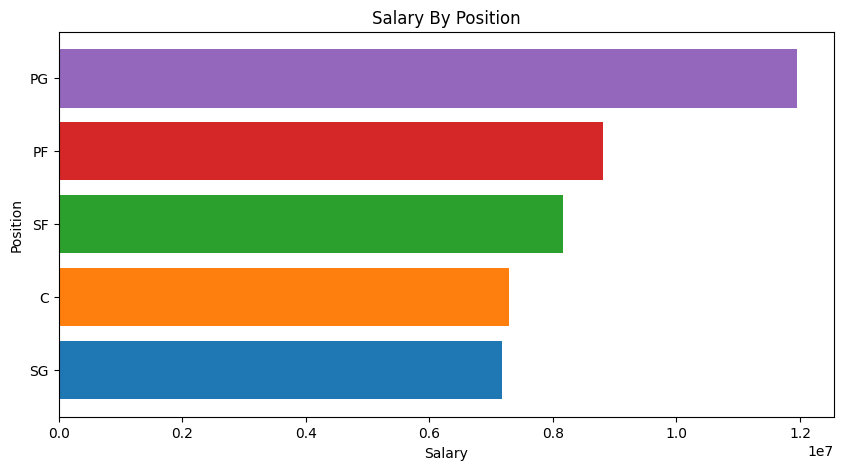

In [35]:
salary_by_pos = (pos.groupby('Position')['Salary'].sum() / pos.groupby('Position')['Salary'].count()).sort_values(ascending=True)

fig = plt.figure(figsize = (10, 5))
plt.barh(salary_by_pos.index, salary_by_pos.values, color=colors[:len(salary_by_pos)])
plt.xlabel("Salary")
plt.ylabel("Position")
plt.title("Salary By Position")
plt.show()

## $7$ - Add a new column to the data frame named SPM that calculates the salaries per minute of players.

In [36]:
round(nba['Salary'] / (nba['GP'] * nba['MP']))

0      24738.0
1      62726.0
2      22163.0
3      22778.0
4      26369.0
        ...   
462      393.0
463     1171.0
464      573.0
465      167.0
466      143.0
Length: 467, dtype: float64

In [37]:
nba.insert(2, 'SPM', round(nba['Salary'] / (nba['GP'] * nba['MP'])))

In [38]:
nba.columns

Index(['Player Name', 'Salary', 'SPM', 'Position', 'Age', 'Team', 'GP', 'GS',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS'],
      dtype='object')

In [39]:
nba.head(5)

,Player Name,Salary,SPM,Position,Age,Team,GP,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Stephen Curry,48070014,24738.0,PG,34,GSW,56,56,34.7,10.0,...,0.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4
1,John Wall,47345760,62726.0,PG,32,LAC,34,3,22.2,4.1,...,0.681,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4
2,Russell Westbrook,47080179,22163.0,PG,34,LAL/LAC,73,24,29.1,5.9,...,0.656,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9
3,LeBron James,44474988,22778.0,PF,38,LAL,55,54,35.5,11.1,...,0.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9
4,Kevin Durant,44119845,26369.0,PF,34,BRK/PHO,47,47,35.6,10.3,...,0.919,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1


In [40]:
nba['Team'] = nba['Team'].str.split('/')
nba['Position'] = nba['Position'].str.split('-')
nba.head(10)

,Player Name,Salary,SPM,Position,Age,Team,GP,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Stephen Curry,48070014,24738.0,[PG],34,[GSW],56,56,34.7,10.0,...,0.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4
1,John Wall,47345760,62726.0,[PG],32,[LAC],34,3,22.2,4.1,...,0.681,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4
2,Russell Westbrook,47080179,22163.0,[PG],34,"[LAL, LAC]",73,24,29.1,5.9,...,0.656,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9
3,LeBron James,44474988,22778.0,[PF],38,[LAL],55,54,35.5,11.1,...,0.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9
4,Kevin Durant,44119845,26369.0,[PF],34,"[BRK, PHO]",47,47,35.6,10.3,...,0.919,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1
5,Bradley Beal,43279250,25838.0,[SG],29,[WAS],50,50,33.5,8.9,...,0.842,0.8,3.1,3.9,5.4,0.9,0.7,2.9,2.1,23.2
6,Kawhi Leonard,42492492,24320.0,[SF],31,[LAC],52,50,33.6,8.6,...,0.871,1.1,5.4,6.5,3.9,1.4,0.5,1.7,1.6,23.8
7,Paul George,42492492,21930.0,[SF],32,[LAC],56,56,34.6,8.2,...,0.871,0.8,5.3,6.1,5.1,1.5,0.4,3.1,2.8,23.8
8,Giannis Antetokounmpo,42492492,21012.0,[PF],28,[MIL],63,63,32.1,11.2,...,0.645,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1
9,Damian Lillard,42492492,20183.0,[PG],32,[POR],58,58,36.3,9.6,...,0.914,0.8,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2


## $8$ - Calculate Z-Score

### Convert categorical columns into one-hot vector

In [41]:
one_hot_teams = pd.get_dummies(nba['Team'].apply(pd.Series).stack()).sum(level=0)
one_hot_teams

<ipython-input-41-6391aa9f5aad>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  one_hot_teams = pd.get_dummies(nba['Team'].apply(pd.Series).stack()).sum(level=0)


,ATL,BOS,BRK,CHI,CHO,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
463,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
465,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
nba = pd.concat([nba, one_hot_teams], axis=1)
nba = nba.drop('Team', axis=1)
nba

,Player Name,Salary,SPM,Position,Age,GP,GS,MP,FG,FGA,...,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
0,Stephen Curry,48070014,24738.0,[PG],34,56,56,34.7,10.0,20.2,...,0,0,0,0,0,0,0,0,0,0
1,John Wall,47345760,62726.0,[PG],32,34,3,22.2,4.1,9.9,...,0,0,0,0,0,0,0,0,0,0
2,Russell Westbrook,47080179,22163.0,[PG],34,73,24,29.1,5.9,13.6,...,0,0,0,0,0,0,0,0,0,0
3,LeBron James,44474988,22778.0,[PF],38,55,54,35.5,11.1,22.2,...,0,0,0,0,0,0,0,0,0,0
4,Kevin Durant,44119845,26369.0,[PF],34,47,47,35.6,10.3,18.3,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Justin Minaya,35096,393.0,[SF],23,4,0,22.3,1.8,5.8,...,0,0,0,0,1,0,0,0,0,0
463,Kobi Simmons,32795,1171.0,[SG],25,5,0,5.6,0.2,1.2,...,0,0,0,0,0,0,0,0,0,0
464,Gabe York,32171,573.0,[SG],29,3,0,18.7,2.7,7.0,...,0,0,0,0,0,0,0,0,0,0
465,RaiQuan Gray,5849,167.0,[PF],23,1,0,35.0,6.0,12.0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
one_hot_pos = pd.get_dummies(nba['Position'].apply(pd.Series).stack()).sum(level=0)
one_hot_pos

<ipython-input-43-060c8e226e35>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  one_hot_pos = pd.get_dummies(nba['Position'].apply(pd.Series).stack()).sum(level=0)


,C,PF,PG,SF,SG
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
462,0,0,0,1,0
463,0,0,0,0,1
464,0,0,0,0,1
465,0,1,0,0,0


In [44]:
nba = pd.concat([nba, one_hot_pos], axis=1)
nba = nba.drop('Position', axis=1)
nba

,Player Name,Salary,SPM,Age,GP,GS,MP,FG,FGA,FG%,...,SAC,SAS,TOR,UTA,WAS,C,PF,PG,SF,SG
0,Stephen Curry,48070014,24738.0,34,56,56,34.7,10.0,20.2,0.493,...,0,0,0,0,0,0,0,1,0,0
1,John Wall,47345760,62726.0,32,34,3,22.2,4.1,9.9,0.408,...,0,0,0,0,0,0,0,1,0,0
2,Russell Westbrook,47080179,22163.0,34,73,24,29.1,5.9,13.6,0.436,...,0,0,0,0,0,0,0,1,0,0
3,LeBron James,44474988,22778.0,38,55,54,35.5,11.1,22.2,0.500,...,0,0,0,0,0,0,1,0,0,0
4,Kevin Durant,44119845,26369.0,34,47,47,35.6,10.3,18.3,0.560,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Justin Minaya,35096,393.0,23,4,0,22.3,1.8,5.8,0.304,...,0,0,0,0,0,0,0,0,1,0
463,Kobi Simmons,32795,1171.0,25,5,0,5.6,0.2,1.2,0.167,...,0,0,0,0,0,0,0,0,0,1
464,Gabe York,32171,573.0,29,3,0,18.7,2.7,7.0,0.381,...,0,0,0,0,0,0,0,0,0,1
465,RaiQuan Gray,5849,167.0,23,1,0,35.0,6.0,12.0,0.500,...,0,0,0,0,0,0,1,0,0,0


### Calculate z-score

In [45]:
data = nba.iloc[:,3:].values
data

array([[34., 56., 56., ...,  1.,  0.,  0.],
       [32., 34.,  3., ...,  1.,  0.,  0.],
       [34., 73., 24., ...,  1.,  0.,  0.],
       ...,
       [29.,  3.,  0., ...,  0.,  0.,  1.],
       [23.,  1.,  0., ...,  0.,  0.,  0.],
       [24.,  1.,  0., ...,  1.,  0.,  0.]])

$Z = \frac{x - \mu}{\sigma}$

In [46]:
mu = np.mean(data, axis=0)
sigma = np.std(data, axis = 0)
z = (data - mu) / sigma
z

array([[ 1.91542161,  0.31340719,  1.23215798, ...,  2.18298697,
        -0.5020067 , -0.59136366],
       [ 1.44709601, -0.57436383, -0.72605071, ...,  2.18298697,
        -0.5020067 , -0.59136366],
       [ 1.91542161,  0.99941208,  0.0498433 , ...,  2.18298697,
        -0.5020067 , -0.59136366],
       ...,
       [ 0.74460762, -1.82531392, -0.83689271, ..., -0.45808794,
        -0.5020067 ,  1.69100684],
       [-0.66036918, -1.90602037, -0.83689271, ..., -0.45808794,
        -0.5020067 , -0.59136366],
       [-0.42620638, -1.90602037, -0.83689271, ...,  2.18298697,
        -0.5020067 , -0.59136366]])

In [47]:
print("Min value of dataset: ", z.min())
print("Max value of dataset:", z.max())
print("Mean of dataset: ", z.mean())
print("Standard Deviation of dataset: ", z.std())

Min value of dataset:  -4.971176814933738
Max value of dataset: 6.760177512462227
Mean of dataset:  -1.7927566655933302e-17
Standard Deviation of dataset:  1.0
